# Preprocessing expression data

In [255]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [256]:
# carregamento dos dados

expressao_df = pd.read_csv("expressao_genica.csv", index_col=0)
metadata_df = pd.read_csv('metadata.csv', index_col=0)


### Verifiando a presenca de genes mitocondriais e ribossomais e retirando

In [257]:
# lista de genes mitocondriais e ribossomais fonte kue e rubem (gseo)

genes_mitocondriais = pd.read_csv("../genes mito e ribo/genes_mitocondriais.csv", index_col=0)
genes_mitocondriais = genes_mitocondriais["gene_name"].tolist()

genes_ribossomais = ["RPL35,RPL10L,RPL22L1,FAU,RPL13A,RPL36,RSL24D1P11,MRPL13,RPSA,RPL10A,RPS27L,RPL26L1,RSL24D1,RPL3,RPL3L,RPL4,RPL5,RPL6,RPL7,RPL7A,RPL8,RPL9,RPL10,RPL11,RPL12,RPL13,RPL15,RPL17,RPL18,RPL18A,RPL19,RPL21,RPL22,RPL23A,RPL24,RPL26,RPL27,RPL30,RPL27A,RPL28,RPL29,RPL31,RPL32,RPL34,RPL35A,RPL36AL,RPL37,RPL37A,RPL38,RPL39,RPL41,RPL36A,RPLP0,RPLP1,RPLP2,RPS2,RPS3,RPS3A,RPS4X,RPS4Y1,RPS5,RPS6,RPS7,RPS8,RPS9,RPS10,RPS11,RPS12,RPS13,RPS15,RPS15A,RPS16,RPS17,RPS18,RPS19,RPS20,RPS21,RPS23,RPS24,RPS25,RPS26,RPS27,RPS27A,RPS28,RPS29,UBA52,RPL14,RPL23"]
genes_ribossomais = genes_ribossomais[0].split(",")

In [258]:
# verificando a presenca na tabela de expressao
genes_mito_presentes = [gene for gene in genes_mitocondriais if gene in expressao_df.index]
print(f"Genes mitocondriais presentes na tabela de expressão: {len(genes_mito_presentes)}")

genes_ribo_presentes = [gene for gene in genes_ribossomais if gene in expressao_df.index]
print(f"Genes ribossomais presentes na tabela de expressão: {len(genes_ribo_presentes)}")

Genes mitocondriais presentes na tabela de expressão: 0
Genes ribossomais presentes na tabela de expressão: 87


In [259]:
# retirando genes mitocondriais e ribossomais da tabela de expressao

expressao_df = expressao_df.drop(index=genes_ribo_presentes)

### Inspecao dos dados

In [260]:
print("DADOS DE EXPRESSÃO")
print("=" * 50)
print(f"Shape: {expressao_df.shape}")  # (pacientes, genes)
print(f"Total de valores: {expressao_df.size}")
print(f"Genes: {expressao_df.index[:5].tolist()}...")  # Primeiros 5
print(f"Pacientes: {expressao_df.columns[:5].tolist()}...")   # Primeiros 5 genes

print("\nMETADADOS")
print("=" * 50)
print(f"Shape: {metadata_df.shape}")
print(f"Colunas disponíveis: {metadata_df.columns.tolist()}")
print(f"Primeiros pacientes: {metadata_df.index[:5].tolist()}...")

print("\nDistribuição dos subtipos moleculares:")
print("=" * 50)
print(metadata_df["paper_Molecular.Subtype"].value_counts())
print("valores nulos: ", metadata_df["paper_Molecular.Subtype"].isnull().sum())

DADOS DE EXPRESSÃO
Shape: (36853, 412)
Total de valores: 15183436
Genes: ['TSPAN6', 'TNMD', 'DPM1', 'SCYL3', 'FIRRM']...
Pacientes: ['TCGA-D7-6815-01A-11R-1884-13', 'TCGA-IN-A7NT-01A-21R-A354-31', 'TCGA-BR-8365-01A-21R-2343-13', 'TCGA-B7-A5TJ-01A-11R-A31P-31', 'TCGA-CD-8535-01A-11R-2343-13']...

METADADOS
Shape: (412, 112)
Colunas disponíveis: ['patient', 'sample', 'shortLetterCode', 'definition', 'sample_submitter_id', 'sample_type_id', 'tumor_descriptor', 'sample_id', 'sample_type', 'composition', 'days_to_collection', 'state', 'initial_weight', 'preservation_method', 'intermediate_dimension', 'pathology_report_uuid', 'submitter_id', 'shortest_dimension', 'oct_embedded', 'specimen_type', 'longest_dimension', 'is_ffpe', 'tissue_type', 'synchronous_malignancy', 'ajcc_pathologic_stage', 'days_to_diagnosis', 'treatments', 'tissue_or_organ_of_origin', 'age_at_diagnosis', 'primary_diagnosis', 'prior_malignancy', 'year_of_diagnosis', 'prior_treatment', 'diagnosis_is_primary_disease', 'ajcc_

In [261]:
expressao_df.head()

,TCGA-D7-6815-01A-11R-1884-13,TCGA-IN-A7NT-01A-21R-A354-31,TCGA-BR-8365-01A-21R-2343-13,TCGA-B7-A5TJ-01A-11R-A31P-31,TCGA-CD-8535-01A-11R-2343-13,TCGA-VQ-A8PK-01A-12R-A414-31,TCGA-VQ-AA6D-01A-11R-A414-31,TCGA-CG-5721-01A-11R-1602-13,TCGA-FP-8099-01A-11R-2343-13,TCGA-BR-A4J5-01A-21R-A251-31,...,TCGA-VQ-A91V-01A-11R-A414-31,TCGA-VQ-A91X-01A-12R-A414-31,TCGA-VQ-A923-01A-11R-A414-31,TCGA-EQ-8122-01A-11R-2343-13,TCGA-VQ-A8PO-01A-11R-A414-31,TCGA-B7-A5TK-01A-12R-A36D-31,TCGA-D7-8578-01A-21R-2343-13,TCGA-BR-A4J9-01A-12R-A251-31,TCGA-BR-4366-01A-01R-1157-13,TCGA-VQ-A8PH-01A-12R-A414-31
TSPAN6,3875,1352,751,3338,4901,1174,3838,1950,1943,1728,...,1184,32,1972,2813,4360,5816,2902,693,2560,6469
TNMD,5,0,6,1,0,0,0,4,0,1,...,0,1,0,2,22,3,2,0,6,1
DPM1,2712,1849,1817,3823,6283,2242,4371,1825,3279,2406,...,2479,4732,3558,5673,2483,4611,2763,2393,12395,6627
SCYL3,1265,199,1046,1064,1445,885,1324,553,1136,1069,...,1649,1092,1330,1520,688,1041,768,1352,2650,624
FIRRM,501,264,467,607,1246,848,1034,385,804,366,...,895,765,727,1201,591,449,536,251,1540,707


### Filtragem por baixa expressao ou variância

In [262]:
# FILTRO POR EXP MINIMA

limiar = 1        # valor mínimo após log2
frac_min = 0.8   # gene deve estar expresso em pelo menos 80% das amostras

# Criar máscara booleana ?? pesquisar oq isso
mask = (expressao_df > limiar).sum(axis=1) >= (frac_min * expressao_df.shape[1])

# Filtrar genes
df_filtrado = expressao_df[mask]

print(f"Genes antes do filtro: {expressao_df.shape[0]}")
print(f"Genes depois do filtro: {df_filtrado.shape[0]}")

Genes antes do filtro: 36853
Genes depois do filtro: 20042


In [263]:
# Filtrar por variância

variancias = df_filtrado.var(axis=1)
# sem analise da media

# Filtro baseado em limiares absolutos (dar uma olhada no Guo 2019)
mask = (variancias >= 1.0)

print(f"Genes antes: {df_filtrado.shape[0]}")
df_filtr_novo = df_filtrado[mask]


print(f"Genes depois (variância>=1.0): {df_filtr_novo.shape[0]}")

Genes antes: 20042
Genes depois (variância>=1.0): 20042


In [264]:
variancias_ordenadas = variancias.sort_values(ascending=False)
variancias_ordenadas

COX1        1.025416e+12
ND4         3.680995e+11
COL1A1      2.035156e+11
PGC         2.024109e+11
COX3        1.959166e+11
                ...     
HNRNPCP6    1.300562e+01
SF3B4P1     1.278957e+01
ATP5MGP3    1.236336e+01
RPL31P31    1.234660e+01
HNRNPCL1    1.129625e+01
Length: 20042, dtype: float64

In [265]:
df_filtr_novo.head()

,TCGA-D7-6815-01A-11R-1884-13,TCGA-IN-A7NT-01A-21R-A354-31,TCGA-BR-8365-01A-21R-2343-13,TCGA-B7-A5TJ-01A-11R-A31P-31,TCGA-CD-8535-01A-11R-2343-13,TCGA-VQ-A8PK-01A-12R-A414-31,TCGA-VQ-AA6D-01A-11R-A414-31,TCGA-CG-5721-01A-11R-1602-13,TCGA-FP-8099-01A-11R-2343-13,TCGA-BR-A4J5-01A-21R-A251-31,...,TCGA-VQ-A91V-01A-11R-A414-31,TCGA-VQ-A91X-01A-12R-A414-31,TCGA-VQ-A923-01A-11R-A414-31,TCGA-EQ-8122-01A-11R-2343-13,TCGA-VQ-A8PO-01A-11R-A414-31,TCGA-B7-A5TK-01A-12R-A36D-31,TCGA-D7-8578-01A-21R-2343-13,TCGA-BR-A4J9-01A-12R-A251-31,TCGA-BR-4366-01A-01R-1157-13,TCGA-VQ-A8PH-01A-12R-A414-31
TSPAN6,3875,1352,751,3338,4901,1174,3838,1950,1943,1728,...,1184,32,1972,2813,4360,5816,2902,693,2560,6469
DPM1,2712,1849,1817,3823,6283,2242,4371,1825,3279,2406,...,2479,4732,3558,5673,2483,4611,2763,2393,12395,6627
SCYL3,1265,199,1046,1064,1445,885,1324,553,1136,1069,...,1649,1092,1330,1520,688,1041,768,1352,2650,624
FIRRM,501,264,467,607,1246,848,1034,385,804,366,...,895,765,727,1201,591,449,536,251,1540,707
FGR,644,263,557,344,154,230,206,1498,765,839,...,269,61,929,646,706,1219,489,366,379,181


### normalizacao 

In [266]:
#df_log2 = np.log2(df_filtr_novo + 1)
#df_log2.head() # tiraa

In [267]:
df_zscore = df_filtr_novo.apply(lambda x: (x - x.mean()) / x.std(), axis=1)

# Conferir
print("Média dos primeiros genes (esperado ~0):")
print(df_zscore.mean(axis=1).head())

print("Desvio padrão dos primeiros genes (esperado ~1):")
print(df_zscore.std(axis=1).head())

Média dos primeiros genes (esperado ~0):
TSPAN6    3.233659e-17
DPM1      3.449237e-17
SCYL3     6.898473e-17
FIRRM     7.760782e-17
FGR      -1.940196e-17
dtype: float64
Desvio padrão dos primeiros genes (esperado ~1):
TSPAN6    1.0
DPM1      1.0
SCYL3     1.0
FIRRM     1.0
FGR       1.0
dtype: float64


### aplicacao ml

In [268]:
# selecionando apenas os 5 mil genes
top_genes = variancias.sort_values(ascending=False).head(5000).index


df = df_zscore.loc[top_genes].T # Transpor para (amostras, genes)

# pequena gambiarra a seguir
df['subtipo_molecular'] = metadata_df.loc[df.index, "paper_Molecular.Subtype"]
df = df.dropna(subset=['subtipo_molecular'])  # Remove linhas com NaN na coluna 'subtipo_molecular'

# separacao dos dados ainda em gambiarra eu achoo
X = df.drop(columns=['subtipo_molecular'])
y = df['subtipo_molecular']

print("Amostras dps: ", df.shape) # eram 412 amostras, ficaram 274...

Amostras dps:  (274, 5001)


In [269]:
# Divisão estratificada 80% treino / 20% teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.4,
    random_state=42,
    stratify=y  # garante mesma proporção de classes nos dois conjuntos
)

print("Formato dos conjuntos:")
print("Treino:", X_train.shape, "Teste:", X_test.shape)

print("\nDistribuição das classes no treino:")
print(y_train.value_counts(normalize=True))

print("\nDistribuição das classes no teste:")
print(y_test.value_counts(normalize=True))

Formato dos conjuntos:
Treino: (164, 5000) Teste: (110, 5000)

Distribuição das classes no treino:
subtipo_molecular
CIN    0.500000
MSI    0.213415
GS     0.195122
EBV    0.091463
Name: proportion, dtype: float64

Distribuição das classes no teste:
subtipo_molecular
CIN    0.490909
MSI    0.218182
GS     0.200000
EBV    0.090909
Name: proportion, dtype: float64


In [270]:
# =============== TENTATIVA DE SMOTE ===============

from imblearn.over_sampling import SMOTE

# Aplicar SMOTE apenas no treino
smote = SMOTE(random_state=22, k_neighbors=5)  # k_neighbors ajusta como os sintéticos são criados tenho q daruma estudadda
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Antes do SMOTE:", y_train.value_counts())
print("Depois do SMOTE:", y_train_res.value_counts())


Antes do SMOTE: subtipo_molecular
CIN    82
MSI    35
GS     32
EBV    15
Name: count, dtype: int64
Depois do SMOTE: subtipo_molecular
CIN    82
MSI    82
GS     82
EBV    82
Name: count, dtype: int64


### random forest

In [271]:
rf = RandomForestClassifier(random_state=56)

rf.fit(X_train_res, y_train_res)
y_pred = rf.predict(X_test)

📊 Avaliação do Modelo Random Forest

- Acurácia: 0.7818181818181819
- Balanced Accuracy: 0.7449705387205386
- Cohen’s Kappa: 0.663437021927588

--- Relatório de Classificação ---
              precision    recall  f1-score   support

         CIN     0.7797    0.8519    0.8142        54
         EBV     0.8750    0.7000    0.7778        10
          GS     0.6667    0.6364    0.6512        22
         MSI     0.8636    0.7917    0.8261        24

    accuracy                         0.7818       110
   macro avg     0.7962    0.7450    0.7673       110
weighted avg     0.7841    0.7818    0.7809       110



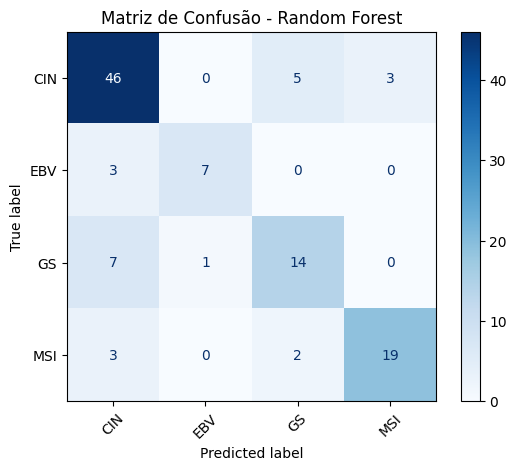

- ROC-AUC (macro): 0.9332347937621458


In [272]:
# --- Importações ---
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, classification_report,
    confusion_matrix, ConfusionMatrixDisplay,
    roc_auc_score, cohen_kappa_score
)
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt


# -------------------------------
# 3. Treinamento do Random Forest
# -------------------------------
rf = RandomForestClassifier(
    n_estimators=200,  # número de árvores
    random_state=42,
    class_weight=None, # não usar balanceamento interno pq já aplicamos SMOTE
    n_jobs=-1
)
rf.fit(X_train_res, y_train_res)

# -------------------------------
# 4. Predição no conjunto de teste
# -------------------------------
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)

# -------------------------------
# 5. Avaliação Completa
# -------------------------------

print("📊 Avaliação do Modelo Random Forest\n")

# Acurácia simples
print("- Acurácia:", accuracy_score(y_test, y_pred))

# Acurácia balanceada
print("- Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))

# Kappa de Cohen
print("- Cohen’s Kappa:", cohen_kappa_score(y_test, y_pred))

# Relatório detalhado
print("\n--- Relatório de Classificação ---")
print(classification_report(y_test, y_pred, digits=4))

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Matriz de Confusão - Random Forest")
plt.show()

# ROC-AUC Multiclasse (One-vs-Rest)
y_test_bin = label_binarize(y_test, classes=rf.classes_)
roc_auc = roc_auc_score(y_test_bin, y_pred_proba, average="macro", multi_class="ovr")
print("- ROC-AUC (macro):", roc_auc)


### aplicacao dos dados do lab